In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
#get wsi size
import tifffile
from PIL import Image
he_path = r"/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Interns_2024/projects/single_cell_xenium_pred/open_source_temp_data/Xenium_V1_FFPE_Human_Breast_IDC_With_Addon_he_image.ome.tif"
he_load = tifffile.imread(he_path, is_ome = True, level = 0, aszarr = False)
he_img = Image.fromarray(he_load.transpose(1,2,0))
wsi_size = he_img.size
wsi_size

(48441, 53833)

In [3]:
data_path = r'/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Interns_2024/projects/single_cell_xenium_pred/final_workspace/poc/data/'

In [4]:
df = pd.read_parquet(data_path + "processed_df_full_exp.parquet").drop('gene_exp_vector', axis = 1)
df = df.sort_values('cell_id')
df.head()

cell_id  arr_index   x_centroid    y_centroid
index                                                  
0      aaaabecc-1          0  3990.303955   4050.244385
1      aaaabggh-1          1  3913.579102   4072.067383
2      aaaacpcd-1          2  7792.178223  41386.574219
3      aaaaeclm-1          3  7743.524902  41405.804688
4      aaaaiale-1          4  7781.018066  41439.066406

In [5]:
import scanpy as sc
import NaiveDE
import SpatialDE

In [6]:
adata = sc.read_10x_h5(r"/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Interns_2024/projects/single_cell_xenium_pred/open_source_temp_data/cell_feature_matrix.h5")

In [7]:
df_counts = adata.to_df()
df_counts = df_counts.sort_index()
df_counts = df_counts.reset_index(drop = True)
df_counts

ABCC11  ACKR1  ACTA2  ACTG2  ADAM9  ADGRE5  ADGRL4  ADH1B  ADIPOQ  \
0          0.0    0.0    0.0    0.0    0.0     0.0     0.0    0.0     0.0   
1          0.0    0.0    3.0    0.0    0.0     0.0     0.0    0.0     0.0   
2          0.0    0.0    2.0    0.0    2.0     1.0     1.0    0.0     0.0   
3          1.0    0.0    1.0    0.0    0.0     0.0     0.0    0.0     0.0   
4          2.0    0.0    0.0    0.0    1.0     0.0     0.0    0.0     0.0   
...        ...    ...    ...    ...    ...     ...     ...    ...     ...   
576958     2.0    0.0    3.0    0.0    1.0     0.0     0.0    0.0     0.0   
576959     0.0    0.0    0.0    0.0    0.0     0.0     0.0    0.0     0.0   
576960     0.0    0.0    0.0    1.0    2.0     0.0     0.0    0.0     0.0   
576961     0.0    0.0    0.0    1.0    0.0     0.0     0.0    0.0     0.0   
576962     1.0    0.0    0.0    0.0    0.0     0.0     0.0    0.0     0.0   

        AEBP1  ...  UCP1  USP53  VEGFC  VOPP1  VWF  WARS  XCR1  ZEB1  ZEB2  \
0         0.0  ...   0.0    0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0   
1         0.0  ...   0.0    0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0   
2         4.0  ...   0.0    0.0    0.0    1.0  2.0   1.0   0.0   5.0   0.0   
3         0.0  ...   0.0    0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0   
4         0.0  ...   0.0    1.0    0.0    1.0  0.0   1.0   0.0   0.0   0.0   
...       ...  ...   ...    ...    ...    ...  ...   ...   ...   ...   ...   
576958    0.0  ...   0.0    0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0   
576959    0.0  ...   0.0    0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0   
576960    0.0  ...   0.0    2.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0   
576961    0.0  ...   0.0    1.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0   
576962    0.0  ...   0.0    0.0    0.0    0.0  0.0   0.0   0.0   0.0   0.0   

        ZNF562  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          2.0  
...        ...  
576958     0.0  
576959     0.0  
576960     3.0  
576961     0.0  
576962     0.0  

[576963 rows x 380 columns]

In [8]:
genes = list(df_counts.columns) #remove the index column
len(genes)

380

In [9]:
df = df.reset_index(drop=True)
df_counts = df_counts.reset_index(drop=True)
print(len(df))
print(len(df_counts))

576963
576963


In [10]:
df_final = pd.concat([df, df_counts], axis = 1)
df_final

cell_id  arr_index    x_centroid    y_centroid  ABCC11  ACKR1  \
0       aaaabecc-1          0   3990.303955   4050.244385     0.0    0.0   
1       aaaabggh-1          1   3913.579102   4072.067383     0.0    0.0   
2       aaaacpcd-1          2   7792.178223  41386.574219     0.0    0.0   
3       aaaaeclm-1          3   7743.524902  41405.804688     1.0    0.0   
4       aaaaiale-1          4   7781.018066  41439.066406     2.0    0.0   
...            ...        ...           ...           ...     ...    ...   
576958  oiknppjn-1     576958  39304.746094  12066.510742     2.0    0.0   
576959  oikobelc-1     576959  39286.535156  12129.398438     0.0    0.0   
576960  oikodiap-1     576960  39285.167969  12091.558594     0.0    0.0   
576961  oikodnab-1     576961  39282.789062  12187.510742     0.0    0.0   
576962  oikoeaen-1     576962  39309.671875  12131.429688     1.0    0.0   

        ACTA2  ACTG2  ADAM9  ADGRE5  ...  UCP1  USP53  VEGFC  VOPP1  VWF  \
0         0.0    0.0    0.0     0.0  ...   0.0    0.0    0.0    0.0  0.0   
1         3.0    0.0    0.0     0.0  ...   0.0    0.0    0.0    0.0  0.0   
2         2.0    0.0    2.0     1.0  ...   0.0    0.0    0.0    1.0  2.0   
3         1.0    0.0    0.0     0.0  ...   0.0    0.0    0.0    0.0  0.0   
4         0.0    0.0    1.0     0.0  ...   0.0    1.0    0.0    1.0  0.0   
...       ...    ...    ...     ...  ...   ...    ...    ...    ...  ...   
576958    3.0    0.0    1.0     0.0  ...   0.0    0.0    0.0    0.0  0.0   
576959    0.0    0.0    0.0     0.0  ...   0.0    0.0    0.0    0.0  0.0   
576960    0.0    1.0    2.0     0.0  ...   0.0    2.0    0.0    0.0  0.0   
576961    0.0    1.0    0.0     0.0  ...   0.0    1.0    0.0    0.0  0.0   
576962    0.0    0.0    0.0     0.0  ...   0.0    0.0    0.0    0.0  0.0   

        WARS  XCR1  ZEB1  ZEB2  ZNF562  
0        0.0   0.0   0.0   0.0     0.0  
1        0.0   0.0   0.0   0.0     0.0  
2        1.0   0.0   5.0   0.0     0.0  
3        0.0   0.0   0.0   0.0     0.0  
4        1.0   0.0   0.0   0.0     2.0  
...      ...   ...   ...   ...     ...  
576958   0.0   0.0   0.0   0.0     0.0  
576959   0.0   0.0   0.0   0.0     0.0  
576960   0.0   0.0   0.0   0.0     3.0  
576961   0.0   0.0   0.0   0.0     0.0  
576962   0.0   0.0   0.0   0.0     0.0  

[576963 rows x 384 columns]

In [11]:
gene_group_patch_size = 256
num_x_patches = wsi_size[0] // gene_group_patch_size
num_y_patches = wsi_size[1] // gene_group_patch_size

In [12]:
print(num_x_patches)
print(num_y_patches)

189
210


In [13]:
df_final['patch_x'] = df_final['x_centroid'] // gene_group_patch_size
df_final['patch_y'] = df_final['y_centroid'] // gene_group_patch_size

In [14]:
df_final['patch_index'] = df_final['patch_y'] * (num_x_patches + 1) + df_final['patch_x']

In [15]:
df_final['patch_center_x'] = (df_final['patch_x'] * gene_group_patch_size) + (gene_group_patch_size/2)
df_final['patch_center_y'] = (df_final['patch_y'] * gene_group_patch_size) + (gene_group_patch_size/2)

In [16]:
df_by_index = df_final.groupby('patch_index')

In [17]:
columns = ['patch_index', 'patch_center_x', 'patch_center_y']+genes
len(columns)

383

In [18]:
patched_gene_df = pd.DataFrame(columns=columns)
patched_gene_df

Empty DataFrame
Columns: [patch_index, patch_center_x, patch_center_y, ABCC11, ACKR1, ACTA2, ACTG2, ADAM9, ADGRE5, ADGRL4, ADH1B, ADIPOQ, AEBP1, AGR3, AIF1, AKR1C1, AKR1C3, ALDH1A3, ANGPT2, ANKRD28, ANKRD29, ANKRD30A, APC, APOBEC3A, APOBEC3B, APOC1, AQP1, AQP3, AR, ARSG, AVPR1A, BAALC, BACE2, BANK1, BASP1, BIRC3, BUB1, C11orf96, C15orf48, C1QA, C1QC, C2orf42, C5orf46, C6orf132, CACNG4, CAPN9, CAV1, CAVIN2, CCDC6, CCDC80, CCL18, CCL19, CCL26, CCL5, CCL8, CCND1, CCPG1, CCR7, CD14, CD163, CD19, CD247, CD27, CD274, CD36, CD3E, CD3G, CD4, CD40, CD52, CD68, CD69, CD79A, CD79B, CD80, CD83, CD86, CD8A, CD9, CD93, CD96, CDC42EP1, CDH1, CEACAM6, CEACAM8, CEBPB, CEL, CENPF, CILP, CLEC14A, CLEC9A, CLECL1, CLIC6, CPA3, CRISPLD2, CST1, CTH, CTHRC1, CTLA4, CTSG, ...]
Index: []

[0 rows x 383 columns]

In [19]:
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

for index, sub_df in tqdm(df_by_index, total = len(df_by_index)):
    temp_row = dict.fromkeys(columns, None)
    for gene in genes:
        temp_row[gene] = np.mean(sub_df[gene].tolist(), axis = 0)
    temp_row['patch_index'] = list(set(sub_df['patch_index']))[0]
    temp_row['patch_center_x'] = list(set(sub_df['patch_center_x']))[0]
    temp_row['patch_center_y'] = list(set(sub_df['patch_center_y']))[0]
    
#     patched_gene_df = pd.concat([patched_gene_df, pd.DataFrame(temp_row)], ignore_index = True)
    patched_gene_df = patched_gene_df.append(temp_row, ignore_index = True)
    
#     temp_avg_vector = np.mean(sub_df['gene_exp_vector'].tolist(), axis = 0)
    #append deprecated need to do concat in final
#     patched_gene_df = patched_gene_df.append({'patch_index': list(set(sub_df['patch_index']))[0], 
#                                          'avg_gene_exp_vector': temp_avg_vector,
#                                          'patch_center_x': list(set(sub_df['patch_center_x']))[0],
#                                          'patch_center_y': list(set(sub_df['patch_center_y']))[0]
#                                         }, ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 25977/25977 [09:30<00:00, 45.52it/s]


In [20]:
patched_gene_df.sort_values(by = 'patch_index').head()

patch_index  patch_center_x  patch_center_y    ABCC11  ACKR1     ACTA2  \
0        235.0         11648.0           384.0  0.000000    0.0  1.000000   
1        245.0         14208.0           384.0  0.000000    0.0  0.000000   
2        423.0         11136.0           640.0  0.000000    0.0  3.333333   
3        424.0         11392.0           640.0  0.111111    0.0  6.000000   
4        425.0         11648.0           640.0  0.000000    0.0  1.200000   

      ACTG2     ADAM9    ADGRE5    ADGRL4  ...  UCP1     USP53     VEGFC  \
0  1.000000  0.000000  0.000000  0.000000  ...   0.0  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  ...   0.0  0.000000  0.000000   
2  1.333333  0.000000  0.000000  1.333333  ...   0.0  0.000000  0.666667   
3  0.888889  0.666667  0.444444  0.555556  ...   0.0  0.777778  0.222222   
4  0.400000  1.200000  0.000000  0.000000  ...   0.0  0.400000  0.000000   

      VOPP1       VWF      WARS  XCR1      ZEB1      ZEB2    ZNF562  
0  0.000000  0.000000  0.000000   0.0  0.000000  0.000000  0.000000  
1  0.000000  1.000000  0.000000   0.0  0.000000  0.000000  0.000000  
2  0.333333  0.333333  0.333333   0.0  0.000000  1.000000  0.333333  
3  0.333333  0.222222  0.333333   0.0  0.333333  2.222222  0.444444  
4  0.000000  0.000000  0.200000   0.0  0.200000  1.200000  0.400000  

[5 rows x 383 columns]

In [21]:
len(patched_gene_df)

25977

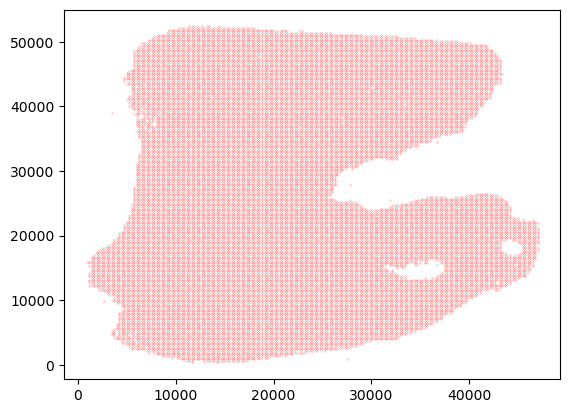

In [27]:
import matplotlib.pyplot as plt
plt.scatter(patched_gene_df['patch_center_x'], patched_gene_df['patch_center_y'], color='red', marker='o', s = 0.02)

In [24]:
df_counts_in = patched_gene_df.drop(['patch_index', 'patch_center_x', 'patch_center_y'], axis = 1)
df_counts_in.head()

ABCC11  ACKR1     ACTA2     ACTG2     ADAM9    ADGRE5    ADGRL4  \
0  0.000000    0.0  1.000000  1.000000  0.000000  0.000000  0.000000   
1  0.000000    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000    0.0  3.333333  1.333333  0.000000  0.000000  1.333333   
3  0.111111    0.0  6.000000  0.888889  0.666667  0.444444  0.555556   
4  0.000000    0.0  1.200000  0.400000  1.200000  0.000000  0.000000   

      ADH1B  ADIPOQ     AEBP1  ...  UCP1     USP53     VEGFC     VOPP1  \
0  0.000000     0.0  0.000000  ...   0.0  0.000000  0.000000  0.000000   
1  0.000000     0.0  0.000000  ...   0.0  0.000000  0.000000  0.000000   
2  0.333333     0.0  0.000000  ...   0.0  0.000000  0.666667  0.333333   
3  0.444444     0.0  0.666667  ...   0.0  0.777778  0.222222  0.333333   
4  0.600000     0.0  0.000000  ...   0.0  0.400000  0.000000  0.000000   

        VWF      WARS  XCR1      ZEB1      ZEB2    ZNF562  
0  0.000000  0.000000   0.0  0.000000  0.000000  0.000000  
1  1.000000  0.000000   0.0  0.000000  0.000000  0.000000  
2  0.333333  0.333333   0.0  0.000000  1.000000  0.333333  
3  0.222222  0.333333   0.0  0.333333  2.222222  0.444444  
4  0.000000  0.200000   0.0  0.200000  1.200000  0.400000  

[5 rows x 380 columns]

In [25]:
# df_in = patched_gene_df[['patch_index', 'patch_center_x', 'patch_center_y']]
# df_in.head()

patch_index  patch_center_x  patch_center_y
0        235.0         11648.0           384.0
1        245.0         14208.0           384.0
2        423.0         11136.0           640.0
3        424.0         11392.0           640.0
4        425.0         11648.0           640.0

In [26]:
df_in = pd.DataFrame(columns = ['x', 'y', 'total_counts'])
df_in

Empty DataFrame
Columns: [x, y, total_counts]
Index: []

In [27]:
df_in['x'] = patched_gene_df['patch_center_x']
df_in['y'] = patched_gene_df['patch_center_y']
df_in['total_counts'] = df_counts_in.sum(axis=1).values
df_in

x        y  total_counts
0      11648.0    384.0     79.000000
1      14208.0    384.0     17.000000
2      11136.0    640.0    130.666667
3      11392.0    640.0    141.888889
4      11648.0    640.0    123.400000
...        ...      ...           ...
25972  12160.0  52352.0    175.000000
25973  12672.0  52352.0     95.333333
25974  13184.0  52352.0     79.000000
25975  13440.0  52352.0     84.000000
25976  14464.0  52352.0     59.666667

[25977 rows x 3 columns]

In [35]:
norm_expr = NaiveDE.stabilize(df_counts_in.T).T
resid_expr = NaiveDE.regress_out(df_in, norm_expr.T, 'np.log(total_counts)').T

In [85]:
# print(resid_expr.isna().sum().sum())  # Check for NaNs
# print(np.isinf(resid_expr).sum().sum())  # Check for infinite values
# print(resid_expr.describe())

In [ ]:
X = df_in[['x', 'y']]
results = SpatialDE.run(X, resid_expr)

In [40]:
results.head()

FSV  M         g      l     max_delta         max_ll  max_mu_hat  \
0  2.061105e-09  4  C11orf96  128.0  4.851652e+08  114542.344860   -0.023921   
1  2.061105e-09  4      CD36  128.0  4.851652e+08  106570.222272   -0.023679   
2  8.423063e-01  4       KDR  128.0  1.872122e-01   10353.951964   -0.171552   
3  8.451750e-01  4     MMP12  128.0  1.831826e-01   56096.921716   -0.023130   
4  2.935450e-01  4     NXPH1  128.0  2.406576e+00   74458.039409   -0.016077   

   max_s2_t_hat model      n    s2_FSV   s2_logdelta      time            BIC  \
0  1.197276e-12    SE  25977  0.087723  1.495158e+16  0.004250 -229044.029853   
1  1.188620e-12    SE  25977  0.004248  7.239656e+14  0.004330 -213099.784676   
2  3.921773e-02    SE  25977  0.000029  1.569775e-03  0.018993  -20667.244061   
3  9.752953e-04    SE  25977  0.000033  1.824214e-03  0.020867 -112153.183564   
4  1.202355e-04    SE  25977  0.000176  4.443901e-03  0.006037 -148875.418950   

     max_ll_null         LLR          pval          qval  
0  114542.344850    0.000010  9.975257e-01  7.159300e-02  
1  106570.222262    0.000010  9.975291e-01  7.159300e-02  
2    9953.029382  400.922582  0.000000e+00  0.000000e+00  
3   55706.879491  390.042225  0.000000e+00  0.000000e+00  
4   74432.111369   25.928040  3.543839e-07  2.598122e-08

In [56]:
results.to_parquet(data_path + 'spatialde_results_128.parquet')

In [43]:
results_sorted = results.sort_values('qval')[['g', 'l', 'qval']]

In [60]:
results_sorted.iloc[200]

g             ISLR
l       273.462948
qval           0.0
Name: 26, dtype: object

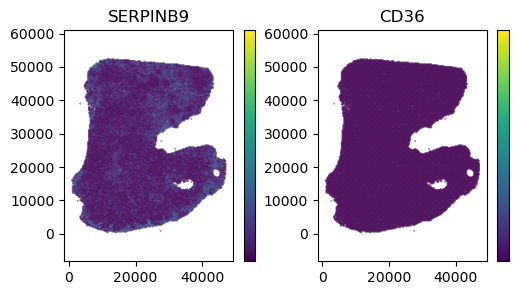

In [86]:
plt.figure(figsize = (6, 3))
for i, g in enumerate(['SERPINB9', 'CD36']):
    plt.subplot(1, 2, i + 1)
    plt.scatter(df_in['x'], df_in['y'], c=norm_expr[g], s = 0.05);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

In [63]:
results_sorted.to_parquet(data_path + 'spatialde_results_128_sorted.parquet')

<h1>Saving Versions</h1>

In [1]:
data_path = r'/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Interns_2024/projects/single_cell_xenium_pred/final_workspace/poc/data/'

In [4]:
load_test = pd.read_parquet(data_path + 'spatialde_results_128_sorted.parquet')
load_test

g             l      qval
index                                  
242    SERPINB9    584.234251  0.000000
253       SNAI1    584.234251  0.000000
252         SMS    584.234251  0.000000
251       SMAP2    584.234251  0.000000
250      SLC5A6    584.234251  0.000000
...         ...           ...       ...
377         CEL  12171.415909  0.000034
372       CCL26   5697.083447  0.006858
1          CD36    128.000000  0.071593
0      C11orf96    128.000000  0.071593
376      PCDH10   5697.083447  0.071593

[380 rows x 3 columns]

In [6]:
top_10_columns = list(load_test.head(50)['g'])
top_10_columns

['SERPINB9',
 'SNAI1',
 'SMS',
 'SMAP2',
 'SLC5A6',
 'SLC26A3',
 'SLC25A37',
 'SLAMF7',
 'SLAMF1',
 'SFRP4',
 'SFRP1',
 'SERPING1',
 'SNX20',
 'SERHL2',
 'SELL',
 'SEC11C',
 'SDC4',
 'SCGB2A1',
 'SCD',
 'S100A8',
 'S100A4',
 'S100A14',
 'RUNX1',
 'RORC',
 'SVIL',
 'TGFBR1',
 'TFAP2A',
 'TENT5C',
 'TCL1A',
 'TCIM',
 'TCF7',
 'TCF4',
 'TBX3',
 'TAPBP',
 'TAP1',
 'TAC1',
 'ROR1',
 'STC2',
 'STC1',
 'STAT3',
 'SRPK1',
 'SRGN',
 'SQLE',
 'SPOCK2',
 'SPIB',
 'SOX18',
 'SOX17',
 'MMP11',
 'NKG7',
 'NARS']

In [9]:
vector_len = 10

In [12]:
import scanpy as sc
load_test = pd.read_parquet(data_path + 'spatialde_results_128_sorted.parquet')

df = pd.read_parquet(data_path + "processed_df_full_exp.parquet").drop('gene_exp_vector', axis = 1)
df = df.sort_values('cell_id')

df['gene_exp_vector'] = np.full(len(df), 'na')

adata = sc.read_10x_h5(r"/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Interns_2024/projects/single_cell_xenium_pred/open_source_temp_data/cell_feature_matrix.h5")
sc.pp.normalize_total(adata, target_sum=1)
sc.pp.log1p(adata)

top_columns = list(load_test.head(vector_len)['g'])

df_gene_exp = adata.to_df()
df_gene_exp = df_gene_exp.sort_index()
df_gene_exp = df_gene_exp.reset_index(drop = True)
df_gene_exp = df_gene_exp[top_columns]

for i, row in tqdm(df.iterrows(), total = len(df)):
    df.at[i, 'gene_exp_vector'] = df_gene_exp.iloc[i].tolist()    

/dartfs/rc/nosnapshots/V/VaickusL-nb/EDIT_Interns_2023/user/AshankS/anaconda3/envs/Ashank/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
100%|█████████████████████████████████████████████████████████████████████████████████████| 576963/576963 [00:29<00:00, 19259.67it/s]


In [14]:
df.to_parquet(data_path + 'spatially_var_10_df.parquet')

In [13]:
df

cell_id  arr_index    x_centroid    y_centroid  \
index                                                       
0       aaaabecc-1          0   3990.303955   4050.244385   
1       aaaabggh-1          1   3913.579102   4072.067383   
2       aaaacpcd-1          2   7792.178223  41386.574219   
3       aaaaeclm-1          3   7743.524902  41405.804688   
4       aaaaiale-1          4   7781.018066  41439.066406   
...            ...        ...           ...           ...   
576958  oiknppjn-1     576958  39304.746094  12066.510742   
576959  oikobelc-1     576959  39286.535156  12129.398438   
576960  oikodiap-1     576960  39285.167969  12091.558594   
576961  oikodnab-1     576961  39282.789062  12187.510742   
576962  oikoeaen-1     576962  39309.671875  12131.429688   

                                          gene_exp_vector  
index                                                      
0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2       [0.0, 0.0, 0.005249355919659138, 0.00524935591...  
3       [0.0, 0.0, 0.0068259648978710175, 0.0, 0.01360...  
4       [0.0, 0.0, 0.0, 0.0, 0.004914014600217342, 0.0...  
...                                                   ...  
576958  [0.0, 0.0, 0.0, 0.011049836874008179, 0.011049...  
576959  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
576960  [0.0, 0.0, 0.0, 0.0, 0.01671348139643669, 0.0,...  
576961  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
576962  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[576963 rows x 5 columns]

In [74]:
df_gene_exp[list(results_sorted.head(vector_len)['g'])]

SERPINB9  SNAI1  SMS  SMAP2  SLC5A6  SLC26A3  SLC25A37  SLAMF7  \
0            0.0    0.0  0.0    0.0     0.0      0.0       0.0     0.0   
1            0.0    0.0  0.0    0.0     0.0      0.0       0.0     0.0   
2            0.0    0.0  1.0    1.0     1.0      0.0       0.0     0.0   
3            0.0    0.0  1.0    0.0     2.0      0.0       0.0     0.0   
4            0.0    0.0  0.0    0.0     1.0      0.0       0.0     0.0   
...          ...    ...  ...    ...     ...      ...       ...     ...   
576958       0.0    0.0  0.0    1.0     1.0      0.0       0.0     0.0   
576959       0.0    0.0  0.0    0.0     0.0      0.0       0.0     0.0   
576960       0.0    0.0  0.0    0.0     3.0      0.0       0.0     0.0   
576961       0.0    0.0  0.0    0.0     0.0      0.0       0.0     0.0   
576962       0.0    0.0  0.0    0.0     0.0      0.0       0.0     0.0   

        SLAMF1  SFRP4  ...  SRPK1  SRGN  SQLE  SPOCK2  SPIB  SOX18  SOX17  \
0          0.0    0.0  ...    1.0   1.0   0.0     0.0   0.0    0.0    0.0   
1          0.0    0.0  ...    0.0   0.0   0.0     0.0   0.0    0.0    0.0   
2          0.0   10.0  ...    0.0   0.0   1.0     0.0   0.0    1.0    0.0   
3          0.0    0.0  ...    0.0   0.0   0.0     0.0   0.0    0.0    0.0   
4          0.0    0.0  ...    2.0   0.0   0.0     0.0   0.0    0.0    0.0   
...        ...    ...  ...    ...   ...   ...     ...   ...    ...    ...   
576958     0.0    0.0  ...    1.0   0.0   0.0     0.0   0.0    0.0    0.0   
576959     0.0    0.0  ...    0.0   0.0   0.0     0.0   0.0    0.0    0.0   
576960     0.0    0.0  ...    0.0   0.0   1.0     0.0   0.0    0.0    0.0   
576961     0.0    0.0  ...    0.0   0.0   0.0     0.0   0.0    0.0    0.0   
576962     0.0    0.0  ...    0.0   0.0   0.0     0.0   0.0    0.0    0.0   

        MMP11  NKG7  NARS  
0         0.0   0.0   0.0  
1         0.0   0.0   1.0  
2         0.0   0.0   0.0  
3         0.0   0.0   2.0  
4         0.0   0.0   1.0  
...       ...   ...   ...  
576958    0.0   0.0   0.0  
576959    0.0   0.0   0.0  
576960    0.0   0.0   1.0  
576961    0.0   0.0   0.0  
576962    0.0   0.0   0.0  

[576963 rows x 50 columns]